# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
!pip install seaborn

     |████████████████████████████████| 292 kB 7.5 MB/s eta 0:00:01


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') #실ㅇ행시 뜨는 경고메세지는 무시해라.

In [4]:
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips = sns.load_dataset('tips') #seaborn 제공하는 toy dataset 을 DataFrame으로 가져오는 함수. (tips: 팁 데이터셋)
# toy dataset: 패키지에 사용할 수 있는 연습용 공개 데이터
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [6]:
tips['total_bill'] #연속형

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

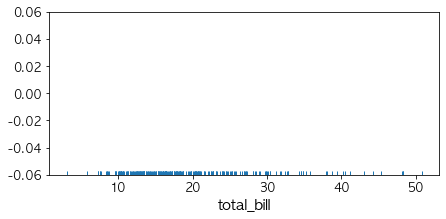

In [8]:
plt.figure(figsize=(7,3))
sns.rugplot(tips['total_bill']) 
plt.show()
# histogram과 같이 시각화해서 각 계급(bin, group별 범위) 안에서의 값의 분포를 확인할 수 있다.

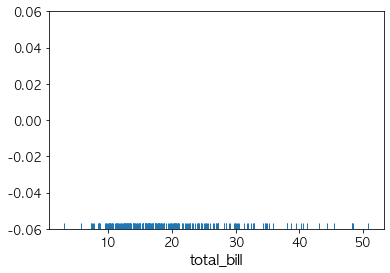

In [10]:
#seaborn은 dataframe과 연동이 atplotlib보다 쉽다.
# 그래프를 그릴때 사용할 값에다 컬럼명을 지정, data=DataFrame을 지정.
sns.rugplot('total_bill', data=tips)
plt.show()

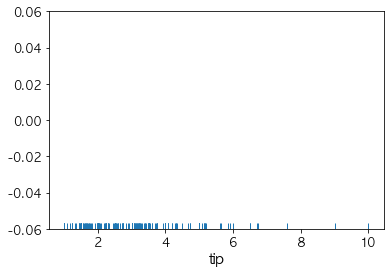

In [11]:
sns.rugplot('tip',data=tips)
pl
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

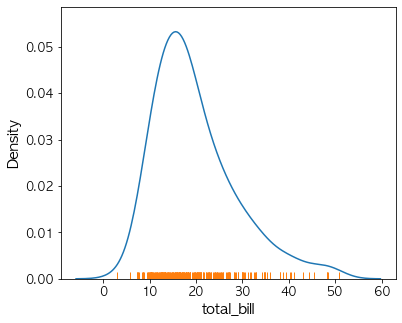

In [12]:
plt.figure(figsize=(6,5))
#sns.kdeplot(tips['total_bill'])
sns.kdeplot('total_bill', data=tips) #y축: 수량의 비율
sns.rugplot('total_bill', data=tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

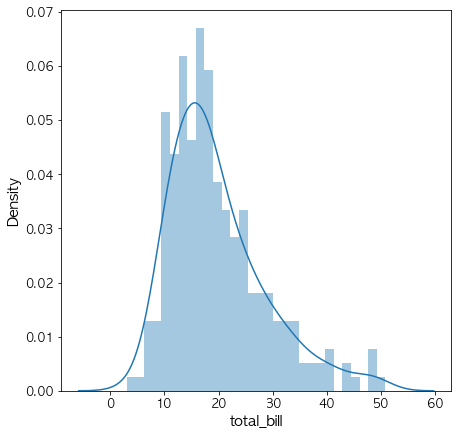

In [15]:
plt.figure(figsize=(7,7))
sns.distplot(tips['total_bill'], #컬럼명, data=DF형식으로 호출할 수 없다.
             hist = True, # 히스토그램을 그릴지 여부(True: default)
             kde = True, # kdeplot을 그릴지 여부(True: default)
             rug = False,# rugplot을 그릴지 여부(False: default)
             bins=30) # histogram의 bins의 개수

plt.show()

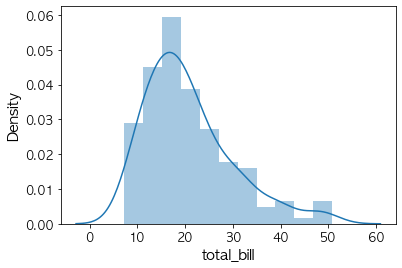

In [19]:
a = tips.loc[tips['sex'] == 'Male', 'total_bill'] #남성의 total bill
b = tips.loc[tips['sex'] == 'FeMale', 'total_bill'] #여성의 total bill

sns.distplot(a)
sns.distplot(b)
plt.show()

<Figure size 504x504 with 0 Axes>

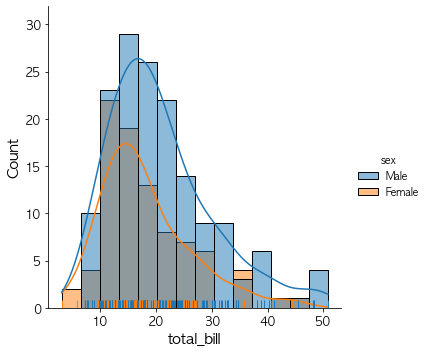

In [21]:
#group별로 나눠서 히스토그램, rugplot, kdeplot 등을 확인
# displot() - group 별로 나눠서 시각화. (distplot(): 하나의 컬럼에 대해서만 시각화)
plt.figure(figsize=(7,7))
sns.displot(x='total_bill', hue = 'sex', data=tips,
            kde=True, rug = True) # kde, rug: default - False
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

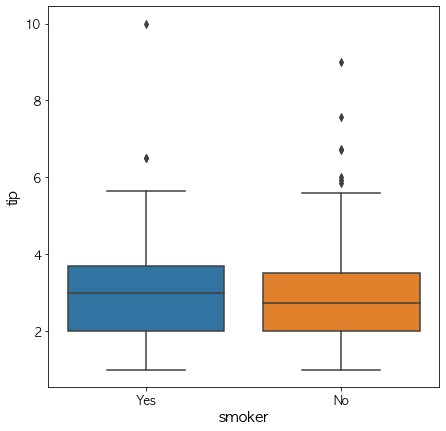

In [22]:
#흡연 여부별 tip의 분포를 boxplot 비교 - 한 axes 시각화
plt.figure(figsize=(7,7))
# 수직

sns.boxplot(y='tip', x= 'smoker', data=tips)
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='tip'>

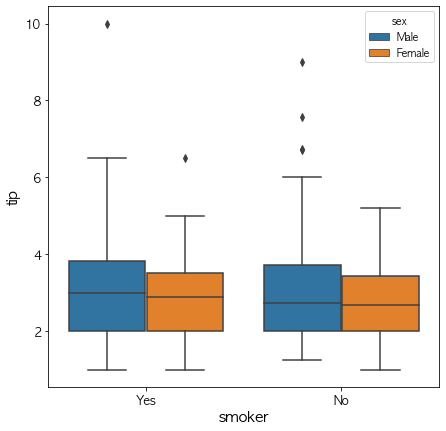

In [24]:
#흡연 + 성별 tip 분포를 boxplot
plt.figure(figsize = (7,7))
sns.boxplot(y='tip', x = 'smoker', hue='sex',data = tips)

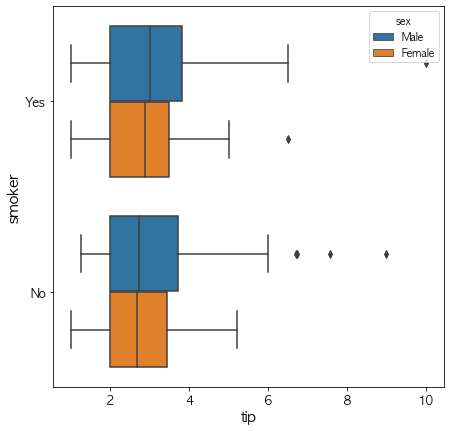

In [25]:
plt.figure(figsize = (7,7))
#수평
sns.boxplot(x='tip', y = 'smoker', hue='sex',data = tips)
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

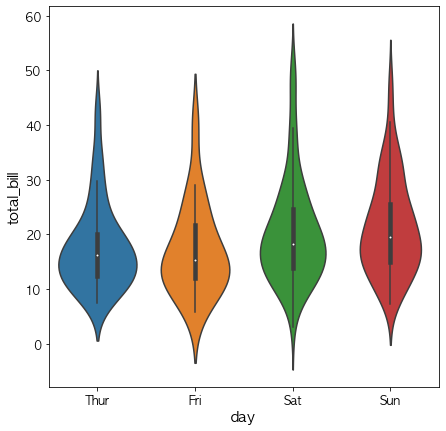

In [27]:
# 요일(data) 별 분포
plt.figure(figsize=(7,7))
sns.violinplot(y='total_bill', x='day', data=tips)
plt.show()

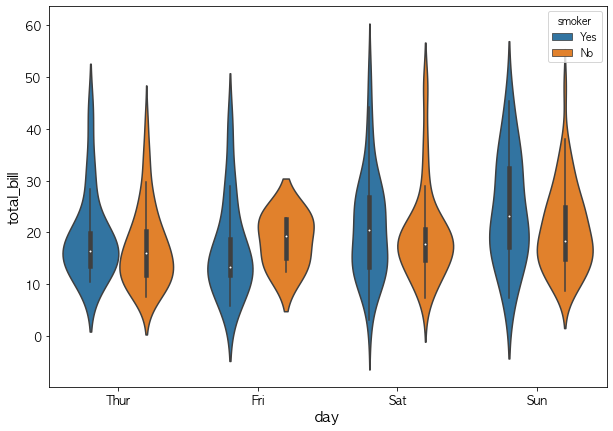

In [28]:
# 요일(data) 별 분포
plt.figure(figsize=(10,7))
sns.violinplot(y='total_bill', x='day', hue = 'smoker', data=tips)
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

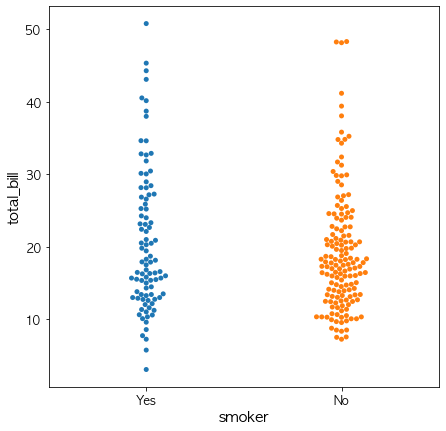

In [29]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill',x='smoker',data=tips)
plt.show()

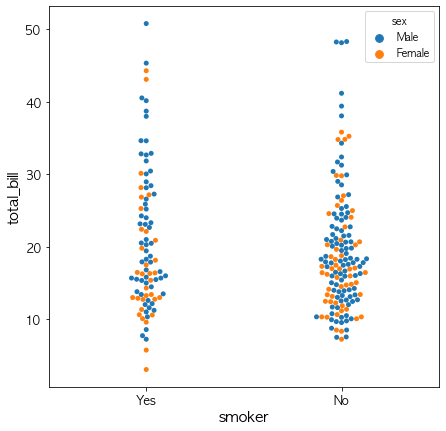

In [31]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill',x='smoker',hue ='sex',data=tips)
plt.show()

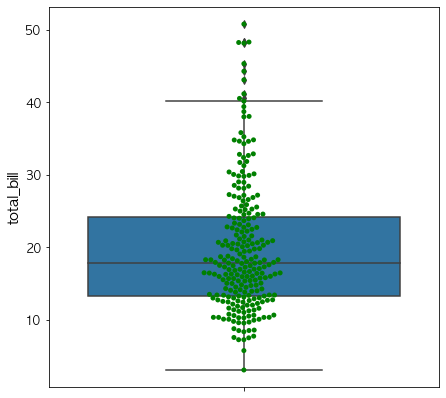

In [34]:
plt.figure(figsize=(7,7))
sns.boxplot(y='total_bill', data= tips)
sns.swarmplot(y='total_bill', data=tips, color='green')
plt.show()

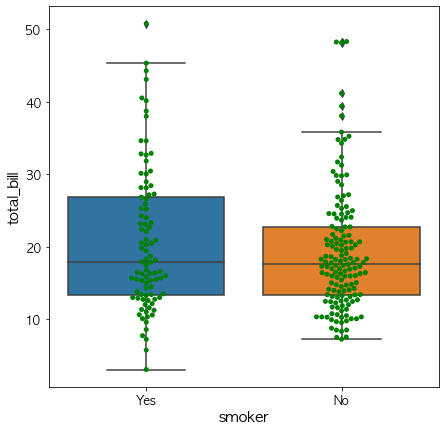

In [37]:
plt.figure(figsize=(7,7))
sns.boxplot(y='total_bill',x='smoker', data= tips)
sns.swarmplot(y='total_bill',x='smoker', data=tips, color='green')
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

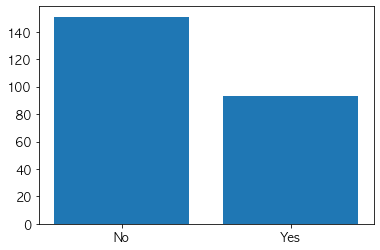

In [38]:
#matplotlib
#개수를 세는 작업을 한뒤에 그결과로 시각화
vc = tips['smoker'].value_counts()
plt.bar(vc.index,vc)
plt.show()

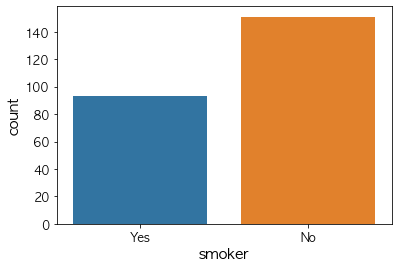

In [39]:
sns.countplot(x='smoker', data=tips) #범주형 컬럼을 x에 전달: 범주값별로 개수를 세서 막대그래프를 그린다.
plt.show()

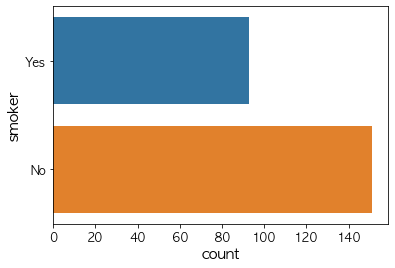

In [41]:
sns.countplot(y='smoker',data = tips) # y=컬럼명: 수평막대그래프, x=컬렴명:수직막대그래프
plt.show()

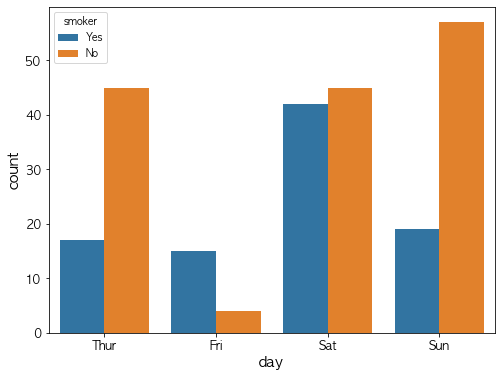

In [43]:
#요일별 흡연자/비흡연자 수
plt.figure(figsize=(8,6))
sns.countplot(x='day', hue = 'smoker',data=tips)
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

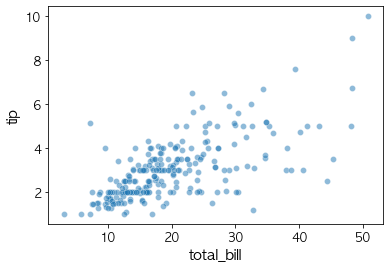

In [44]:
#total_bill과 tip 관계
sns.scatterplot(x='total_bill', y='tip', data=tips, alpha=0.5)
plt.show()

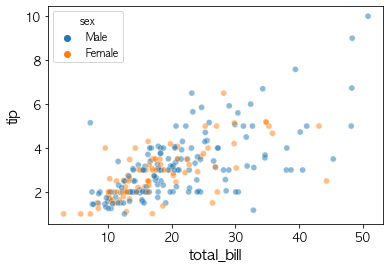

In [45]:
#total_bill과 tip 관계 성별로 나눠서
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips,alpha=0.5)
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.
    - 선혈회귀 적합선: 상관관계를 표현할 수 있는 선을 같이 그려준다.

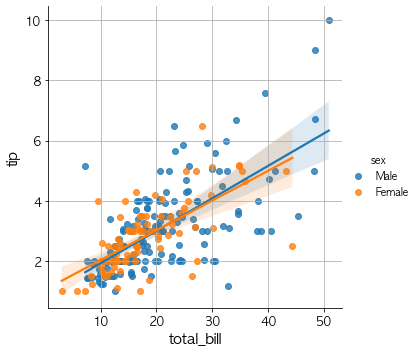

In [48]:
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips)
plt.grid(True)
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

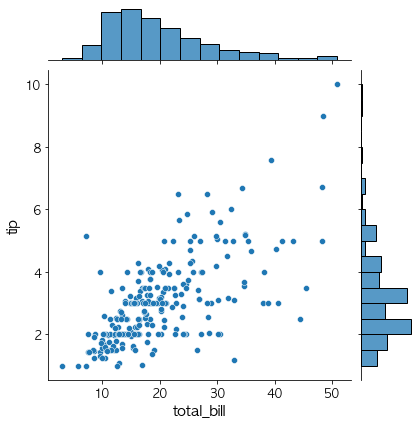

In [49]:
sns.jointplot(x='total_bill',y='tip',data=tips)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

<Figure size 1080x1080 with 0 Axes>

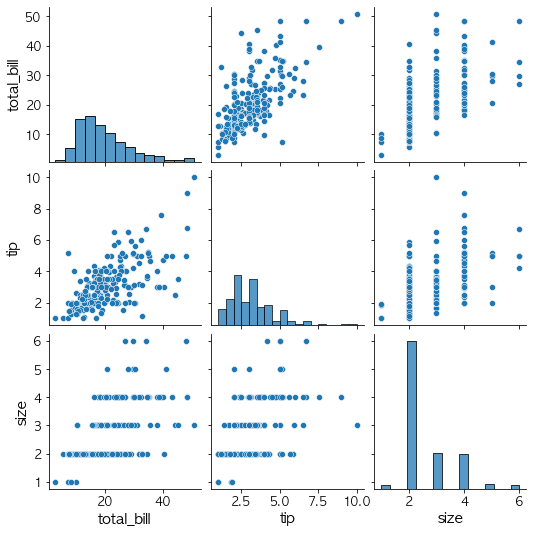

In [51]:
plt.figure(figsize=(15,15))
sns.pairplot(tips) #매개변수 : dataframe
plt.show()

### heatmap()
- 값들에 비레해서 색깔을 다르게 해 2차원 자료로 시각화

In [53]:
# total_bill, tip, size 컬럼간의 상관계수
corr_df = tips[['total_bill','tip','size']].corr()
corr_df

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
#matplotlib - imshow()  im : image

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)